# Retention and sales rates for google log file

## 1. Checking and clearing google_log dataset

In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting visualization style

plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# Uploading dataset

df = pd.read_csv('google_log.csv', sep='\t')
df.head()

C:\Users\Snake\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,...,totals.pageviews,totals.transactionRevenue,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,20160902,1131660440785968503,1131660440785968503_1472830385,Organic Search,1472830385,Chrome,Windows,False,desktop,Western Asia,...,1.0,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
1,20160902,377306020877927890,377306020877927890_1472880147,Organic Search,1472880147,Firefox,Macintosh,False,desktop,Australasia,...,1.0,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
2,20160902,3895546263509774583,3895546263509774583_1472865386,Organic Search,1472865386,Chrome,Windows,False,desktop,Southern Europe,...,1.0,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN
3,20160902,4763447161404445595,4763447161404445595_1472881213,Organic Search,1472881213,UC Browser,Linux,False,desktop,Southeast Asia,...,1.0,NaN,google,organic,google + online,NaN,NaN,NaN,NaN,NaN
4,20160902,27294437909732085,27294437909732085_1472822600,Organic Search,1472822600,Chrome,Android,True,mobile,Northern Europe,...,1.0,NaN,google,organic,(not provided),NaN,NaN,NaN,NaN,NaN


In [4]:
# Getting more appropriate values for total transactions

df['totals.transactionRevenue'] = df['totals.transactionRevenue'] / 10**6

In [5]:
# Checking the percentage of null values for each feature
# We see that some features have a huge amount of missing values

df.shape

(903653, 24)

In [6]:
100 * df.isnull().sum() / df.shape[0]

date                                             0.000000
fullVisitorId                                    0.000000
sessionId                                        0.000000
channelGrouping                                  0.000000
visitStartTime                                   0.000000
device.browser                                   0.000000
device.operatingSystem                           0.000000
device.isMobile                                  0.000000
device.deviceCategory                            0.000000
geoNetwork.subContinent                          0.000000
geoNetwork.country                               0.000000
geoNetwork.region                                0.000000
geoNetwork.city                                  0.000000
totals.hits                                      0.000000
totals.pageviews                                 0.011066
totals.transactionRevenue                       98.725728
trafficSource.source                             0.000000
trafficSource.

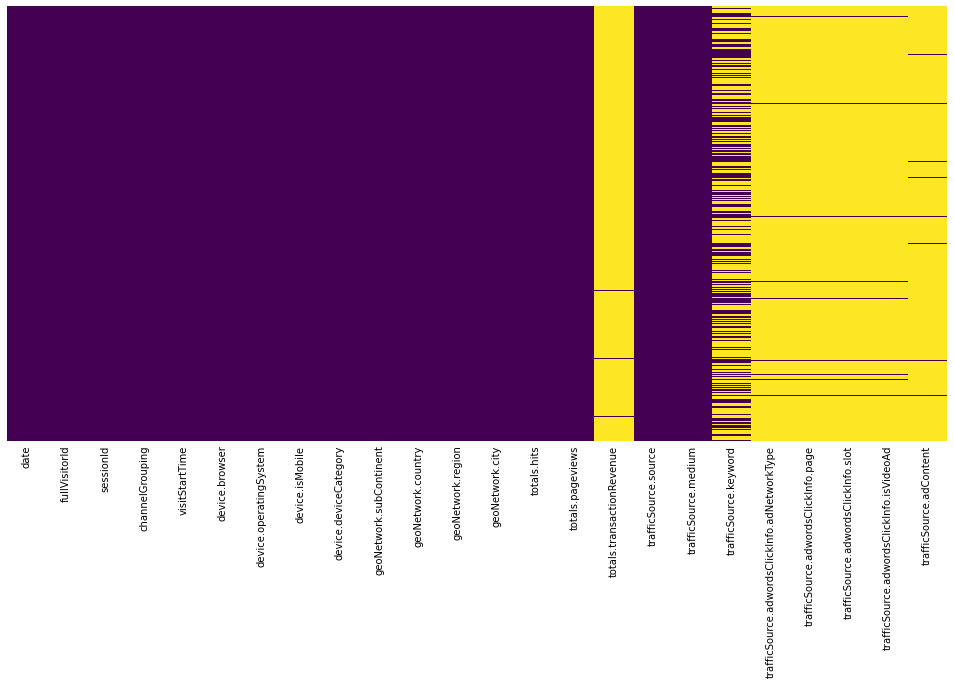

In [7]:
# We can check it with special heatmap visualization

fig, ax = plt.subplots(figsize=(15,8))

sns_heatmap = sns.heatmap(df.sample(5000).isnull(),
                         yticklabels=False,
                         cbar=False,
                         cmap='viridis')

In [8]:
# Describe function shows, that dataset has some huge outliers

df.describe()

,date,visitStartTime,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.adwordsClickInfo.page
count,9.036530e+05,9.036530e+05,903653.000000,903553.000000,11515.000000,21460.000000
mean,2.016589e+07,1.485007e+09,4.596538,3.849764,133.744789,1.008108
std,4.697698e+03,9.022124e+06,9.641437,7.025274,448.285227,0.173584
min,2.016080e+07,1.470035e+09,1.000000,1.000000,0.010000,1.000000
25%,2.016103e+07,1.477561e+09,1.000000,1.000000,24.930000,1.000000
50%,2.017011e+07,1.483949e+09,2.000000,1.000000,49.450000,1.000000
75%,2.017042e+07,1.492759e+09,4.000000,4.000000,107.655000,1.000000
max,2.017080e+07,1.501657e+09,500.000000,469.000000,23129.500000,14.000000


In [9]:
df.describe(include=object)

,fullVisitorId,sessionId,channelGrouping,device.browser,device.operatingSystem,device.deviceCategory,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.city,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
count,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,903653,400724,21460,21460,21460,10946
unique,731421,902755,8,54,20,3,23,222,376,649,380,7,3659,2,2,1,44
top,1957458976293878100,14108533830165900_1482391162,Organic Search,Chrome,Windows,desktop,Northern America,United States,not available in demo dataset,not available in demo dataset,google,organic,(not provided),Google Search,Top,False,Google Merchandise Collection
freq,252,2,381561,620364,350072,664479,390657,364744,508229,508229,400788,381561,366363,21453,20956,21460,5122


In [10]:
# Setting correct time format and getting new time features

df['date'].dtype

dtype('int64')

In [11]:
# Changing format of date feature

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date'][:10]

0   2016-09-02
1   2016-09-02
2   2016-09-02
3   2016-09-02
4   2016-09-02
5   2016-09-02
6   2016-09-02
7   2016-09-02
8   2016-09-02
9   2016-09-02
Name: date, dtype: datetime64[ns]

In [12]:
# Getting month feature

df['month'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))
df['month'][:10]

0    2016-09
1    2016-09
2    2016-09
3    2016-09
4    2016-09
5    2016-09
6    2016-09
7    2016-09
8    2016-09
9    2016-09
Name: month, dtype: object

In [13]:
# Getting day, month, weekday, week-of-year feature

df['visitDay'] = df['date'].dt.day
df['visitMonth'] = df['date'].dt.month
df['visitWeekday'] = df['date'].dt.weekday
df['visitWeeknum'] = df['date'].dt.weekofyear

C:\Users\Snake\AppData\Local\Temp/ipykernel_5448/2896929055.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['visitWeeknum'] = df['date'].dt.weekofyear


In [14]:
# Getting values is_month_start and is_month_end

df['is_month_start'] = df['date'].dt.is_month_start
df['is_month_end'] = df['date'].dt.is_month_end

In [15]:
from datetime import datetime

In [16]:
# Getting visit hour feature from timestamp data

df['visitHour'] = (df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x).hour))

In [17]:
# Getting full time feature from timestamp data

df['ts'] = df['visitStartTime'].apply(lambda x: datetime.fromtimestamp(x))

In [18]:
df.head()

,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,...,trafficSource.adContent,month,visitDay,visitMonth,visitWeekday,visitWeeknum,is_month_start,is_month_end,visitHour,ts
0,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Organic Search,1472830385,Chrome,Windows,False,desktop,Western Asia,...,NaN,2016-09,2,9,4,35,False,False,18,2016-09-02 18:33:05
1,2016-09-02,377306020877927890,377306020877927890_1472880147,Organic Search,1472880147,Firefox,Macintosh,False,desktop,Australasia,...,NaN,2016-09,2,9,4,35,False,False,8,2016-09-03 08:22:27
2,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Organic Search,1472865386,Chrome,Windows,False,desktop,Southern Europe,...,NaN,2016-09,2,9,4,35,False,False,4,2016-09-03 04:16:26
3,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Organic Search,1472881213,UC Browser,Linux,False,desktop,Southeast Asia,...,NaN,2016-09,2,9,4,35,False,False,8,2016-09-03 08:40:13
4,2016-09-02,27294437909732085,27294437909732085_1472822600,Organic Search,1472822600,Chrome,Android,True,mobile,Northern Europe,...,NaN,2016-09,2,9,4,35,False,False,16,2016-09-02 16:23:20


## 2. Retention metrics

In [19]:
# Checking transaction amount for each day

df.groupby('date').count().head()

,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,geoNetwork.country,...,trafficSource.adContent,month,visitDay,visitMonth,visitWeekday,visitWeeknum,is_month_start,is_month_end,visitHour,ts
date,,,,,,,,,,,,,,,,,,,,,
2016-08-01,1711,1711,1711,1711,1711,1711,1711,1711,1711,1711,...,25,1711,1711,1711,1711,1711,1711,1711,1711,1711
2016-08-02,2140,2140,2140,2140,2140,2140,2140,2140,2140,2140,...,23,2140,2140,2140,2140,2140,2140,2140,2140,2140
2016-08-03,2890,2890,2890,2890,2890,2890,2890,2890,2890,2890,...,16,2890,2890,2890,2890,2890,2890,2890,2890,2890
2016-08-04,3161,3161,3161,3161,3161,3161,3161,3161,3161,3161,...,8,3161,3161,3161,3161,3161,3161,3161,3161,3161
2016-08-05,2702,2702,2702,2702,2702,2702,2702,2702,2702,2702,...,9,2702,2702,2702,2702,2702,2702,2702,2702,2702


In [20]:
# Getting series of transaction amount for each day

df.groupby('date')['fullVisitorId'].count()

date
2016-08-01    1711
2016-08-02    2140
2016-08-03    2890
2016-08-04    3161
2016-08-05    2702
              ... 
2017-07-28    2433
2017-07-29    1597
2017-07-30    1799
2017-07-31    2620
2017-08-01    2556
Name: fullVisitorId, Length: 366, dtype: int64

In [21]:
# Amount of unique IDs for each day

df_day = (

    df.groupby('date')
    .agg({'fullVisitorId': 'nunique'})
    .sort_values('date')

)

df_day.head()

,fullVisitorId
date,
2016-08-01,1569
2016-08-02,1961
2016-08-03,2657
2016-08-04,2947
2016-08-05,2492


Text(0.5, 1.0, 'Mean for visits for a day: 2282.82')

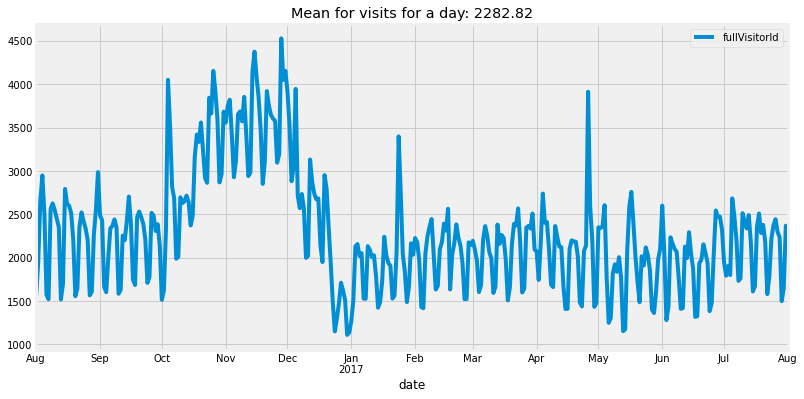

In [22]:
# Average amount of unique IDs for a day and visualization for data above

df_day.plot(figsize=(12,6))
plt.title(f'Mean for visits for a day: {np.round(df_day.fullVisitorId.mean(), 2)}')

In [23]:
# Amount of unique IDs for a month

df_month = (

    df.groupby('month')
    .agg({'fullVisitorId': 'nunique'})
    .sort_values('month')

)

Text(0.5, 1.0, 'Mean for visits for a month: 58884.69')

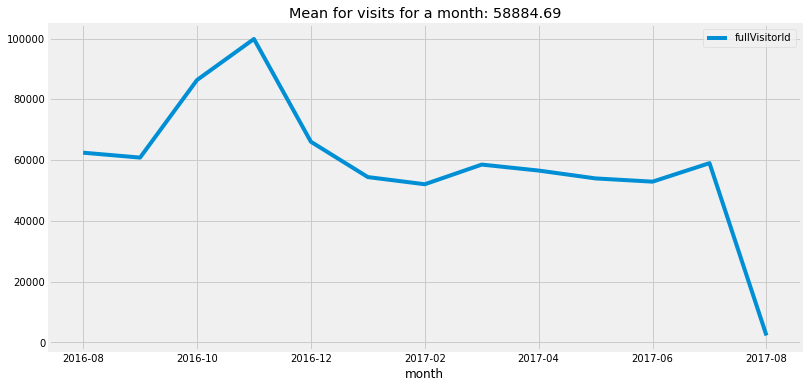

In [24]:
# Average amount of unique IDs for a month and visualization for data above

df_month.plot(figsize=(12,6))
plt.title(f'Mean for visits for a month: {np.round(df_month.fullVisitorId.mean(), 2)}')

In [25]:
# Amount of IDs for a day

df_session = (

    df.groupby('date')
    .agg({'fullVisitorId': 'count'})
    .sort_values('date')

)

Text(0.5, 1.0, 'Mean for visits for a day: 2469.0')

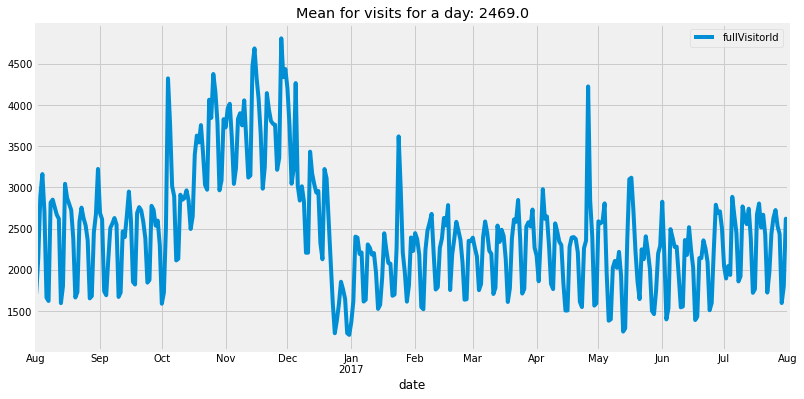

In [26]:
# Average amount of unique IDs for a day and visualization for data above

df_session.plot(figsize=(12,6))
plt.title(f'Mean for visits for a day: {np.round(df_session.fullVisitorId.mean(), 2)}')

In [27]:
# Conclusion: visualization of unique IDs for a day almost looks like visualization of unique IDs for a day.
# It means that useres return to the site not very often. So retention is very weak.

In [28]:
# Creating a subset: the first month, day, full date for each customer.
first_month_session = (

    df.groupby('fullVisitorId')
    .agg({
        'month': 'min',
        'date': 'min',
        'ts': 'min'
    })

)

In [29]:
first_month_session.columns = ['firstinv_month', 'firstinv_day', 'firstinv_ts']
first_month_session.head()

,firstinv_month,firstinv_day,firstinv_ts
fullVisitorId,,,
4823595352351,2016-11,2016-11-01,2016-11-01 16:45:10
5103959234087,2016-08,2016-08-21,2016-08-22 01:06:48
10278554503158,2016-10,2016-10-20,2016-10-21 08:57:46
20424342248747,2016-11,2016-11-30,2016-12-01 09:55:01
26722803385797,2017-06,2017-06-05,2017-06-05 13:26:34


In [30]:
# Adding the new table in the basic dataset
df = df.join(first_month_session, on='fullVisitorId')
df.head()

,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,...,visitMonth,visitWeekday,visitWeeknum,is_month_start,is_month_end,visitHour,ts,firstinv_month,firstinv_day,firstinv_ts
0,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Organic Search,1472830385,Chrome,Windows,False,desktop,Western Asia,...,9,4,35,False,False,18,2016-09-02 18:33:05,2016-09,2016-09-02,2016-09-02 18:33:05
1,2016-09-02,377306020877927890,377306020877927890_1472880147,Organic Search,1472880147,Firefox,Macintosh,False,desktop,Australasia,...,9,4,35,False,False,8,2016-09-03 08:22:27,2016-09,2016-09-02,2016-09-03 08:22:27
2,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Organic Search,1472865386,Chrome,Windows,False,desktop,Southern Europe,...,9,4,35,False,False,4,2016-09-03 04:16:26,2016-09,2016-09-02,2016-09-03 04:16:26
3,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Organic Search,1472881213,UC Browser,Linux,False,desktop,Southeast Asia,...,9,4,35,False,False,8,2016-09-03 08:40:13,2016-09,2016-09-02,2016-09-03 08:40:13
4,2016-09-02,27294437909732085,27294437909732085_1472822600,Organic Search,1472822600,Chrome,Android,True,mobile,Northern Europe,...,9,4,35,False,False,16,2016-09-02 16:23:20,2016-08,2016-08-10,2016-08-10 17:11:26


In [31]:
# Using each visitor ID, current month and month of the first visit we can create pivot table and heatmap to analyse,
# how users return to the site each month after their first visit.
kogort_month = df[['fullVisitorId', 'month', 'firstinv_month']]
kogort_month.head()

,fullVisitorId,month,firstinv_month
0,1131660440785968503,2016-09,2016-09
1,377306020877927890,2016-09,2016-09
2,3895546263509774583,2016-09,2016-09
3,4763447161404445595,2016-09,2016-09
4,27294437909732085,2016-09,2016-08


In [32]:
retention = kogort_month.pivot_table(
    index='firstinv_month',
    columns='month',
    values='fullVisitorId',
    aggfunc='nunique'
)

retention.head()

month,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
firstinv_month,,,,,,,,,,,,,
2016-08,62462.0,2204.0,1033.0,602.0,418.0,271.0,216.0,181.0,139.0,135.0,106.0,89.0,3.0
2016-09,NaN,58645.0,1936.0,699.0,371.0,212.0,135.0,112.0,111.0,77.0,55.0,52.0,1.0
2016-10,NaN,NaN,83411.0,2396.0,753.0,356.0,253.0,192.0,133.0,108.0,83.0,67.0,1.0
2016-11,NaN,NaN,NaN,96199.0,2425.0,620.0,295.0,230.0,168.0,126.0,88.0,78.0,NaN
2016-12,NaN,NaN,NaN,NaN,62098.0,1643.0,457.0,304.0,215.0,153.0,105.0,95.0,3.0


<AxesSubplot:xlabel='month', ylabel='firstinv_month'>

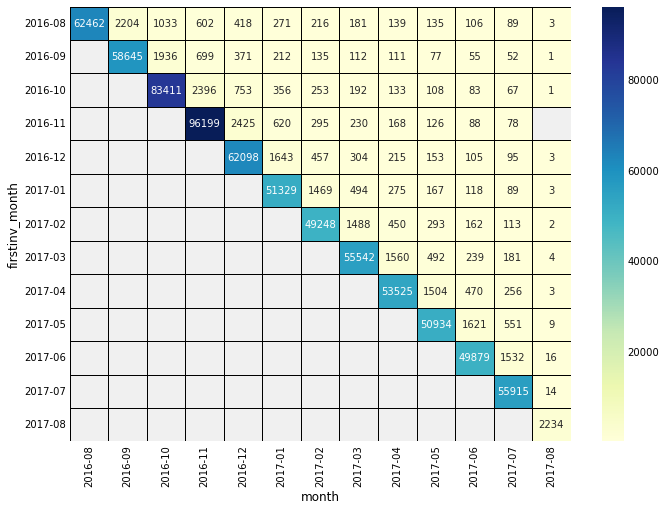

In [33]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    
    retention,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black',
    cmap='YlGnBu'
    
)

In [34]:
# Conclusion. Number of visits falls down with each month.

In [35]:
# Values from main diagonal in retention table
first_date = retention.values.diagonal()
first_date

array([62462., 58645., 83411., 96199., 62098., 51329., 49248., 55542.,
       53525., 50934., 49879., 55915.,  2234.])

In [36]:
for s, row in zip(first_date, retention):
    retention.loc[row] = 100 * (retention.loc[row] / s)

<AxesSubplot:xlabel='month', ylabel='firstinv_month'>

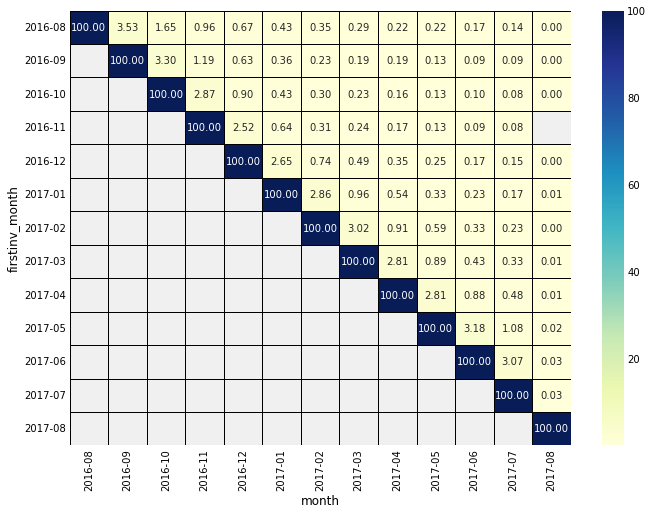

In [37]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    
    retention,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cmap='YlGnBu'
    
)

In [38]:
# The same picture only in percent data. The number of visits drops until it almost reaches zero value.

In [39]:
# Part of visits wich is not the first ones in month.
(kogort_month.month != kogort_month.firstinv_month).mean()

0.06694383795549841

In [40]:
# Part of visits wich is not the first ones in days.
(df.date != df.firstinv_day).mean()

0.13861847412668357

In [41]:
# Conclusion. Only 6% of visits each month are actually of some old customers.

## 3. Shopping activity analysis

In [42]:
# Amount of visits without shopping in the end.
100 * df['totals.transactionRevenue'].isnull().mean()

98.72572768529513

In [43]:
# Visits with shopping in the end.
100 * (1 - df['totals.transactionRevenue'].isnull().mean())

1.2742723147048718

In [44]:
df_buy = df.dropna(subset=['totals.transactionRevenue'])
df_buy.shape

(11515, 36)

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'transactionRevenue (log)')

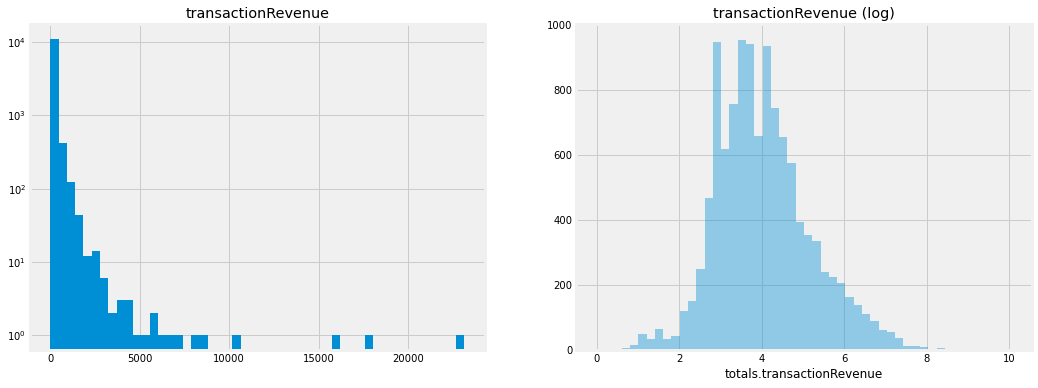

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df_buy['totals.transactionRevenue'].hist(bins=50, log=True, ax=axes[0])
sns.distplot(np.log(df_buy['totals.transactionRevenue'] + 1), ax=axes[1], kde=False)

axes[0].set_title('transactionRevenue')
axes[1].set_title('transactionRevenue (log)')

In [46]:
df_buy.columns

Index(['date', 'fullVisitorId', 'sessionId', 'channelGrouping',
       'visitStartTime', 'device.browser', 'device.operatingSystem',
       'device.isMobile', 'device.deviceCategory', 'geoNetwork.subContinent',
       'geoNetwork.country', 'geoNetwork.region', 'geoNetwork.city',
       'totals.hits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.source', 'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot',
       'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adContent',
       'month', 'visitDay', 'visitMonth', 'visitWeekday', 'visitWeeknum',
       'is_month_start', 'is_month_end', 'visitHour', 'ts', 'firstinv_month',
       'firstinv_day', 'firstinv_ts'],
      dtype='object')

In [47]:
first_day_buy = (

    df_buy.groupby('fullVisitorId')
    .agg({
        'month': 'min',
        'date': 'min',
        'ts': 'min'
    })
    
)

first_day_buy.columns = ['first_month', 'first_day', 'first_ts']

In [48]:
df_buy = df_buy.join(first_day_buy, on='fullVisitorId')

In [49]:
# How often the first visit is not the first shopping day
(df_buy['firstinv_day'] != df_buy['first_day']).mean()

0.34355188884064264

In [50]:
# How many days is between the first visit and the first shopping
df_buy['deltatime_buy'] = (df_buy['first_ts'] - df_buy['firstinv_ts'])/np.timedelta64(1, 'D')

Text(0.5, 0, 'Days between the first visit and the first shopping')

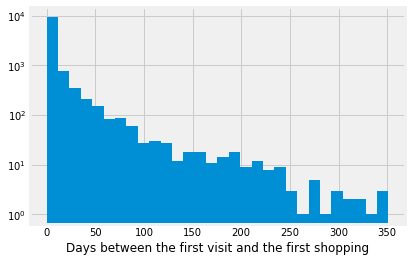

In [51]:
df_buy['deltatime_buy'].hist(bins=30, log=True)
plt.xlabel('Days between the first visit and the first shopping')

In [52]:
# We see many outliers
df_buy['deltatime_buy'].describe()

count    11515.000000
mean         9.056225
std         28.006881
min          0.000000
25%          0.000000
50%          0.000000
75%          3.823142
max        351.061875
Name: deltatime_buy, dtype: float64

Text(0.5, 0, 'Hours between the first visit and the first shopping')

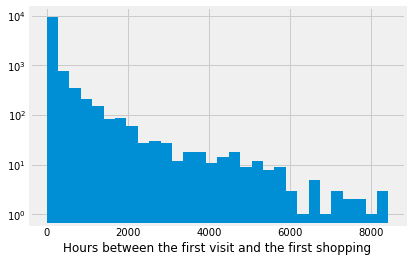

In [53]:
# How many hours is between the first visit and the first shopping
df_buy['deltatime_buy'] = (df_buy['first_ts'] - df_buy['firstinv_ts'])/np.timedelta64(1, 'h')
df_buy['deltatime_buy'].hist(bins=30, log=True)
plt.xlabel('Hours between the first visit and the first shopping')

In [54]:
df_buy['deltatime_buy'].describe()

count    11515.000000
mean       217.349396
std        672.165153
min          0.000000
25%          0.000000
50%          0.000000
75%         91.755417
max       8425.485000
Name: deltatime_buy, dtype: float64

In [55]:
# We can see, that 2 hrs correspond to 60% quantile.
df_buy['deltatime_buy'].quantile(0.6)

2.1727777777777777

In [56]:
# Conclusions: 1) first visit often stands for the first shopping day, 2) there are > 2 hrs between the first visit
# and the first shopping, 3) we have many outliers in the distribution.

<AxesSubplot:xlabel='date'>

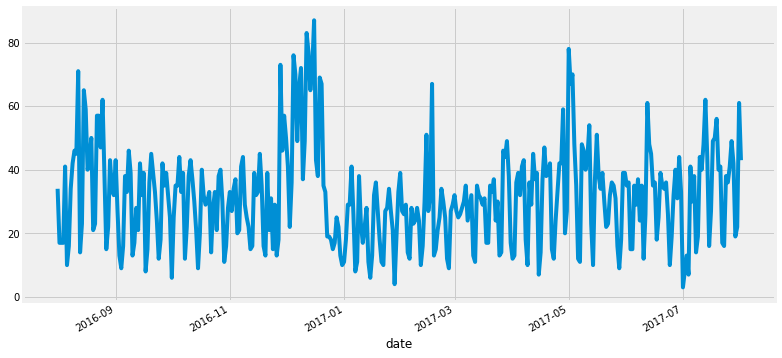

In [57]:
# Date dynamics
# Conclusion: it’s almost identical with visits dynamics.
df_buy.groupby('date')['fullVisitorId'].count().plot(figsize=(12,6))

In [58]:
# Pivot table for hours and weekdays for shopping
df_buy.pivot_table(
    index = 'visitHour',
    columns = 'visitWeekday',
    values = 'totals.transactionRevenue',
    aggfunc = 'sum'
).style.background_gradient()

visitWeekday,0,1,2,3,4,5,6
visitHour,,,,,,,
0,23076.420000,15146.500000,21912.770000,18074.060000,13474.300000,2273.070000,6564.550000
1,14816.820000,18151.060000,9205.550000,14472.730000,12626.250000,5486.950000,4765.350000
2,10006.360000,14140.760000,14404.830000,9142.550000,10584.810000,5241.540000,4846.900000
3,15697.880000,8564.980000,8880.710000,9434.830000,6677.850000,2699.620000,8196.090000
4,9379.530000,9536.370000,11211.610000,10452.330000,9060.660000,2450.860000,3780.850000
5,6333.420000,5243.100000,10396.030000,5176.380000,5863.680000,4848.880000,3607.540000
6,5493.500000,7840.900000,6300.170000,4584.460000,2894.670000,2278.950000,4008.130000
7,6361.930000,9463.190000,3590.450000,4701.630000,2741.570000,1006.500000,3372.630000
8,2626.890000,4047.320000,6191.520000,3342.500000,1506.100000,1221.920000,2391.890000


In [59]:
# Shopping dynamics in cohorts (the first month of buying)
sales = df_buy.pivot_table(
    index = 'first_month',
    columns = 'month',
    values = 'fullVisitorId',
    aggfunc = 'nunique'
)

<AxesSubplot:xlabel='month', ylabel='first_month'>

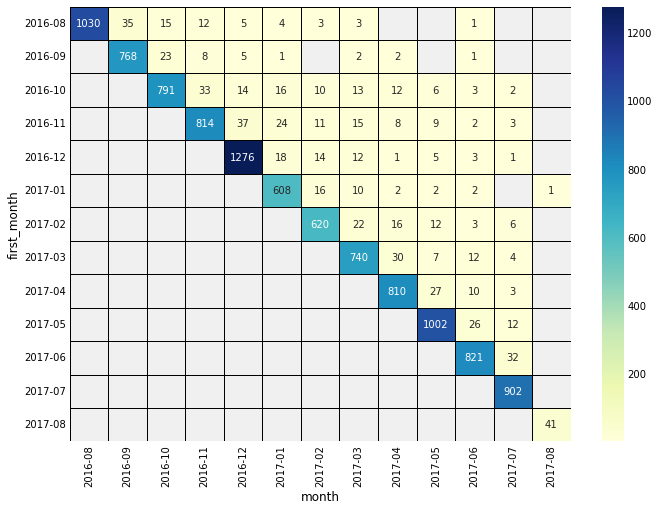

In [60]:
plt.figure(figsize=(10,8))

sns.heatmap(
    sales,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black',
    cmap='YlGnBu'
)

<AxesSubplot:xlabel='date'>

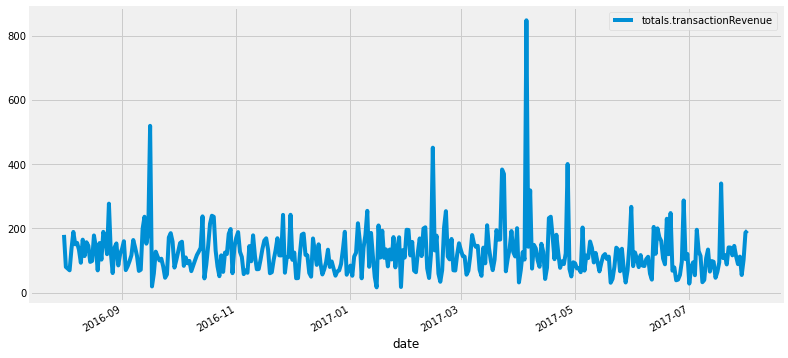

In [61]:
# Mean transaction revenue in days
(df_buy.groupby('date')
.agg({'totals.transactionRevenue':'mean'})
.plot(figsize=(12,6)))

<AxesSubplot:xlabel='month', ylabel='first_month'>

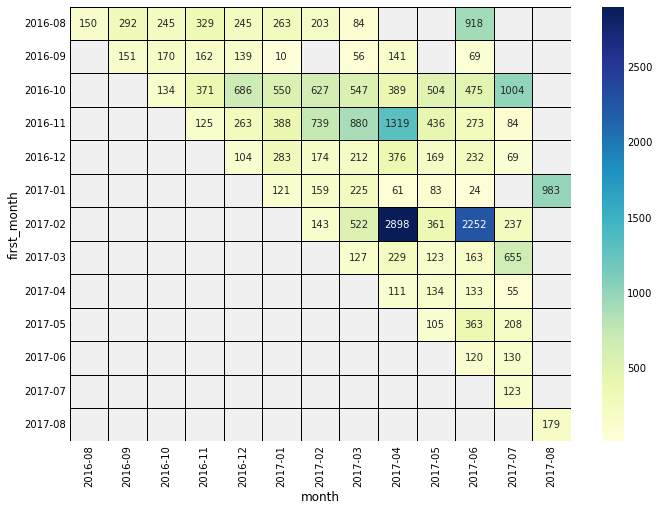

In [62]:
# Mean transaction revenue in days.
sales_sum = df_buy.pivot_table(
    index = 'first_month',
    columns = 'month',
    values = 'totals.transactionRevenue',
    aggfunc = 'sum'
)

plt.figure(figsize=(10,8))
sns.heatmap(
    sales_sum/sales,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black',
    cmap='YlGnBu'
)

## 4. Revenue analysis

In [63]:
df_buy['totals.transactionRevenue'] = df_buy['totals.transactionRevenue'].apply(lambda x: np.log(x + 1))

In [64]:
# The most popular browsers.
df_buy['device.browser'].value_counts()

Chrome               10353
Safari                 780
Firefox                191
Internet Explorer      109
Edge                    58
Safari (in-app)         12
Android Webview          6
Opera                    5
Amazon Silk              1
Name: device.browser, dtype: int64

<AxesSubplot:>

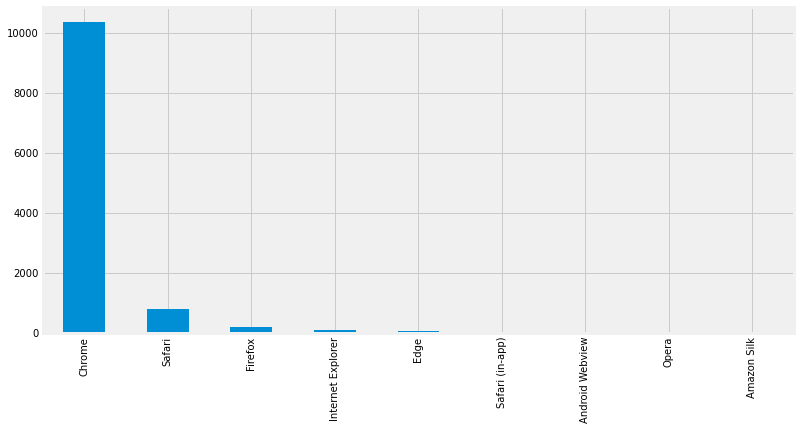

In [65]:
# Visualization of the most popular browsers.
plt.figure(figsize=(12,6))
df_buy['device.browser'].value_counts().plot(kind='bar')

In [66]:
df_buy[df_buy['device.browser'].isin(df_buy['device.browser'].value_counts().index.values)]

,date,fullVisitorId,sessionId,channelGrouping,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.subContinent,...,is_month_end,visitHour,ts,firstinv_month,firstinv_day,firstinv_ts,first_month,first_day,first_ts,deltatime_buy
752,2016-09-02,6194193421514403509,6194193421514403509_1472843572,Direct,1472843572,Chrome,Linux,False,desktop,Northern America,...,False,22,2016-09-02 22:12:52,2016-09,2016-09-02,2016-09-02 22:12:52,2016-09,2016-09-02,2016-09-02 22:12:52,0.000000
753,2016-09-02,5327166854580374902,5327166854580374902_1472844906,Organic Search,1472844906,Chrome,Macintosh,False,desktop,Northern America,...,False,22,2016-09-02 22:35:06,2016-09,2016-09-02,2016-09-02 22:35:06,2016-09,2016-09-02,2016-09-02 22:35:06,0.000000
799,2016-09-02,8885051388942907862,8885051388942907862_1472827393,Referral,1472827393,Chrome,Linux,False,desktop,Northern America,...,False,17,2016-09-02 17:43:13,2016-08,2016-08-06,2016-08-06 21:42:52,2016-08,2016-08-12,2016-08-13 02:02:40,148.330000
802,2016-09-02,185467632009737931,0185467632009737931_1472846398,Referral,1472846398,Chrome,Windows,False,desktop,Northern America,...,False,22,2016-09-02 22:59:58,2016-08,2016-08-30,2016-08-30 22:14:03,2016-09,2016-09-02,2016-09-02 22:59:58,72.765278
859,2016-09-02,3244885836845029978,3244885836845029978_1472824817,Referral,1472824817,Chrome,Macintosh,False,desktop,Northern America,...,False,17,2016-09-02 17:00:17,2016-08,2016-08-19,2016-08-19 22:36:37,2016-08,2016-08-22,2016-08-22 21:50:23,71.229444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903302,2017-01-04,6849604863010168468,6849604863010168468_1483566314,Referral,1483566314,Chrome,Macintosh,False,desktop,Northern America,...,False,23,2017-01-04 23:45:14,2016-10,2016-10-03,2016-10-03 21:33:14,2016-10,2016-10-03,2016-10-03 21:33:14,0.000000
903305,2017-01-04,211986650009953276,0211986650009953276_1483568879,Referral,1483568879,Chrome,Macintosh,False,desktop,Northern America,...,False,0,2017-01-05 00:27:59,2017-01,2017-01-04,2017-01-05 00:27:59,2017-01,2017-01-04,2017-01-05 00:27:59,0.000000
903314,2017-01-04,9981562221973608723,9981562221973608723_1483576938,Referral,1483576938,Chrome,Macintosh,False,desktop,Eastern Asia,...,False,2,2017-01-05 02:42:18,2017-01,2017-01-04,2017-01-05 02:42:18,2017-01,2017-01-04,2017-01-05 02:42:18,0.000000
903315,2017-01-04,963126344221316701,963126344221316701_1483552674,Direct,1483552674,Firefox,Macintosh,False,desktop,Northern America,...,False,19,2017-01-04 19:57:54,2017-01,2017-01-03,2017-01-04 03:30:37,2017-01,2017-01-04,2017-01-04 19:57:54,16.454722


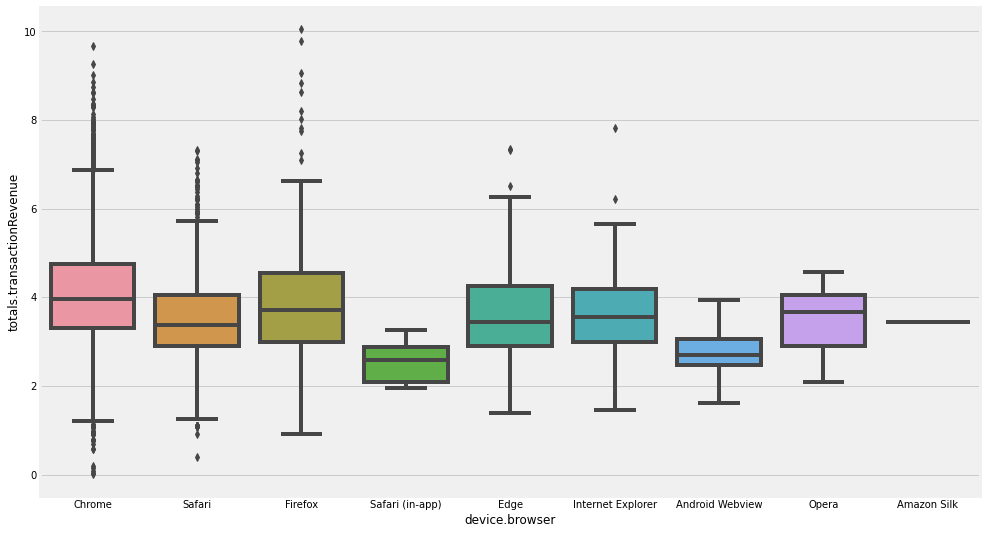

In [67]:
# Transaction revenue for 10 most used browsers in the dataset
# Boxplots don’t give us much information

data = (

    df_buy[df_buy['device.browser']
           .isin(df_buy['device.browser']
                 .value_counts()[:10].index.values)]

)

plt.figure(figsize=(15,9))
g = sns.boxplot(x='device.browser', y='totals.transactionRevenue', data=data)

<AxesSubplot:>

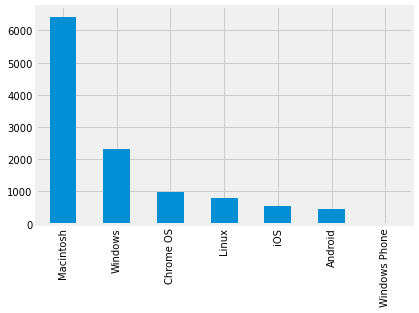

In [68]:
# How often different OS are used

df_buy['device.operatingSystem'].value_counts().plot(kind='bar')

In [69]:
# Density distribution for top 10 OS used also don’t provide us with new data.

data = (

    df_buy[df_buy['device.operatingSystem']
           .isin(df_buy['device.operatingSystem']
                 .value_counts()[:10].index.values)]

)

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


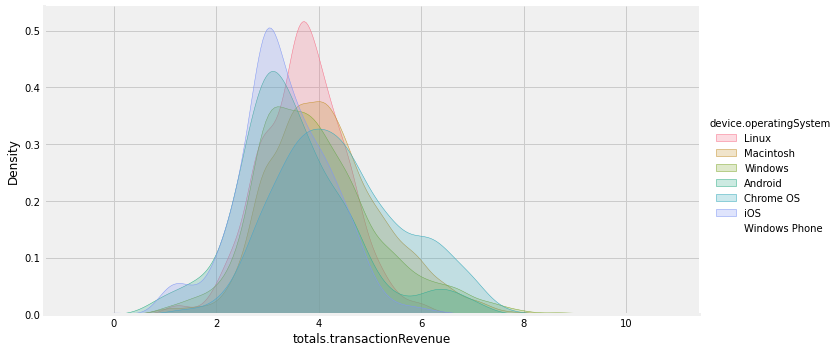

In [70]:
g = (

    sns.FacetGrid(data, hue='device.operatingSystem', height=5, aspect=2)
    .map(sns.kdeplot, 'totals.transactionRevenue', shade=True)
    .add_legend()

)

C:\Users\Snake\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='device.deviceCategory', ylabel='count'>

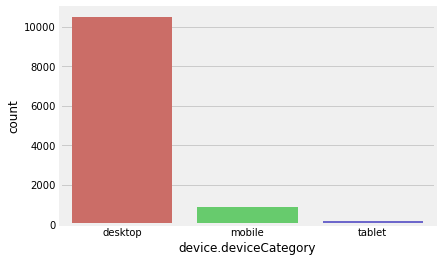

In [71]:
# Popularity of different device types

sns.countplot(df_buy['device.deviceCategory'], palette='hls')

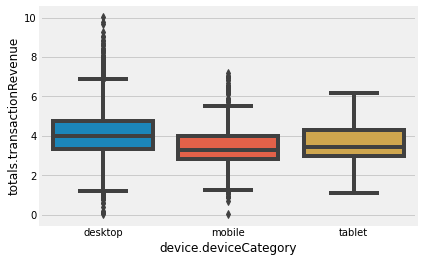

In [72]:
# Transaction revenue according to the different device types

g = sns.boxplot(x='device.deviceCategory', y='totals.transactionRevenue', data=data)

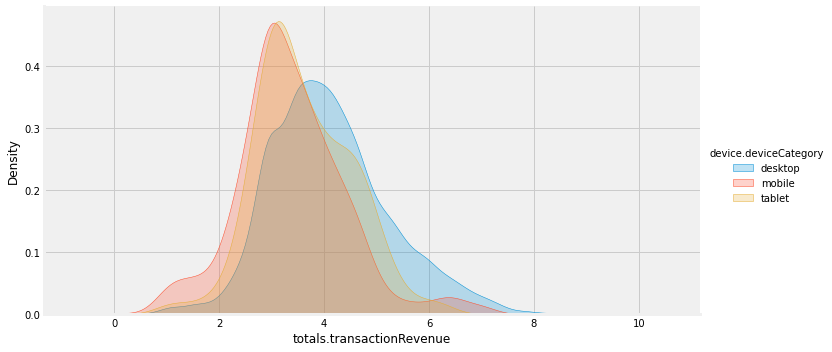

In [73]:
g = (

    sns.FacetGrid(data, hue='device.deviceCategory', height=5, aspect=2)
    .map(sns.kdeplot, 'totals.transactionRevenue', shade=True)
    .add_legend()

)

In [74]:
df_buy['geoNetwork.city'].value_counts()

not available in demo dataset    4579
New York                         1506
Mountain View                    1209
San Francisco                     729
Sunnyvale                         455
                                 ... 
Bellevue                            1
North Attleborough                  1
Indianapolis                        1
Jacksonville                        1
La Victoria                         1
Name: geoNetwork.city, Length: 134, dtype: int64

In [75]:
# Now let’s check top 30 cities according to the transaction revenue

import squarify

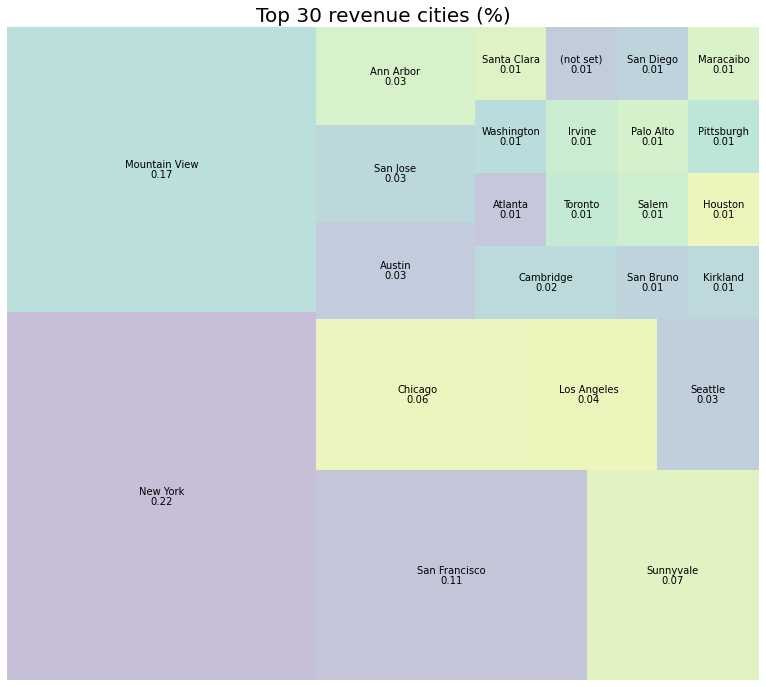

In [76]:
# Taking the rows with identified cities
df_cur = df_buy[df_buy['geoNetwork.city'] != 'not available in demo dataset']

# City value counts
city_tree = df_cur['geoNetwork.city'].value_counts()

# Taking top 30 (frequent) cities in the df_cur dataset
city_tree = round(city_tree[:30] / len(df_cur['geoNetwork.city'] * 100), 2)
city_tree = city_tree[city_tree != 0]

# Visualizing the result: we see, that the most important city here is New York
plt.figure(figsize=(12,12))

g = squarify.plot(

    sizes=city_tree.values,
    label=city_tree.index,
    value=city_tree.values,
    alpha=.3

)

g.set_title('Top 30 revenue cities (%)', fontsize=20)
g.set_axis_off();

# Conclusion

1. Visualization of unique IDs for a day almost looks like visualization of unique IDs for a day. It means that useres return to the site not very often. So retention is very weak.

2. Number of visits falls down with each month.

3. Only 6% of visits each month are actually of some old customers.

4. 98% visits are without shopping in the end.

5. First visit often stands for the first shopping day; there are > 2 hrs between the first visit and the first shopping; we have many outliers in the distribution.

6. New York gives the most transactions.